# Pancreatic Cancer Survival Prediction

# **Introduction and Background**

Pancreatic cancer is one of the most lethal malignancies worldwide, with a five-year survival rate of less than 10% due to its late diagnosis and aggressive progression. Accurate prediction of patient survival at the time of diagnosis remains a critical challenge in oncology, limiting clinicians’ ability to personalize treatment and allocate resources effectively. With the increasing availability of clinical and genomic data, there is a growing opportunity to leverage machine learning to estimate patient outcomes and support evidence-based decision-making.


## **Problem Statement**

Pancreatic cancer is often diagnosed late and is difficult to treat, making it one of the deadliest cancers. Doctors lack accurate tools to predict how long a patient might survive, which limits personalized care. Although there is a lot of clinical and genomic data available, survival is still mainly predicted using general staging systems. This project aims to build a machine learning model that can better predict survival in pancreatic cancer patients, helping doctors make more informed decisions.

By identifying high-risk individuals early, this tool can support treatment planning, improve patient counseling, and guide the selection of candidates for advanced therapies or clinical trials.

### **Project Objectives**

1.	Filter and isolate pancreatic cancer patient data from a larger clinical-genomic dataset to create a focused, high-quality subset for analysis.
2.	Preprocess and engineer features from clinical, pathological, and genomic variables such as tumor mutational burden (TMB), tumor purity, disease stage, and demographic data.
3.	Build a predictive machine learning model to estimate the overall survival status (alive vs. deceased) of pancreatic cancer patients at the time of sample collection or diagnosis.
4.	Evaluate model performance using classification metrics such as accuracy, precision, recall, F1-score, and ROC-AUC to ensure clinical relevance and reliability.
5.	Interpret model outputs to identify the most influential features contributing to survival predictions, thereby providing insights into potential prognostic biomarkers.
6.	Demonstrate potential clinical utility by outlining how the model could support risk stratification, personalized treatment planning, and early patient counseling in real-world oncology settings.


# Work done

We shall divide our work into the following categories:

1.   General Overview
2.   Data Cleaning and Preprocessing
3.   Exploratory Data Analysis
4.   Data Modelling



# 1.	**General Overview**

## MSK-CHORD (MSK, Nature 2024)

The dataset was sourced from the MSK CHORD 2024 clinical-genomic database, which includes over 25,000 different cancer cases.

A subset of 3,109 records corresponding to patients with pancreatic cancer was extracted based on the Cancer Type column.
Targeted sequencing of 25,040 tumors from 24,950 patients and their matched normals via MSK-IMPACT, along with clinical annotations, some of which are derived from natural language processing (denoted NLP). This data is available under the Creative Commons BY-NC-ND 4.0 license.

Data Url: https://www.cbioportal.org/study/summary?id=msk_chord_2024

In [89]:
# importing relevant libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report, roc_curve


In [90]:
# Importing the dataset
df = pd.read_csv('msk_chord_2024_clinical_data.csv')

In [91]:
# Looking at the first 5 rows
df.head()

,Study ID,Patient ID,Sample ID,Tumor Site: Adrenal Glands (NLP),Tumor Site: Bone (NLP),Cancer Type,Cancer Type Detailed,Clinical Group,Clinical Summary,Tumor Site: CNS/Brain (NLP),...,Tumor Site: Reproductive Organs (NLP),Sample Class,Number of Samples Per Patient,Sample coverage,Sample Type,Smoking History (NLP),Somatic Status,Stage (Highest Recorded),TMB (nonsynonymous),Tumor Purity
0,msk_chord_2024,P-0000012,P-0000012-T02-IM3,No,No,Breast Cancer,Breast Invasive Ductal Carcinoma,NaN,NaN,No,...,No,Tumor,2,344,Primary,Former/Current Smoker,Matched,Stage 1-3,1.109155,NaN
1,msk_chord_2024,P-0000012,P-0000012-T03-IM3,No,No,Non-Small Cell Lung Cancer,Lung Adenocarcinoma,3B,Distant,No,...,No,Tumor,2,428,Metastasis,Former/Current Smoker,Matched,Stage 1-3,32.165504,NaN
2,msk_chord_2024,P-0000015,P-0000015-T01-IM3,No,Yes,Breast Cancer,Breast Invasive Ductal Carcinoma,1,Localized,Yes,...,No,Tumor,1,281,Metastasis,Unknown,Matched,Stage 1-3,7.764087,40.0
3,msk_chord_2024,P-0000036,P-0000036-T01-IM3,No,Yes,Non-Small Cell Lung Cancer,Lung Adenocarcinoma,4,Distant,No,...,No,Tumor,1,380,Primary,Never,Unmatched,Stage 4,7.764087,30.0
4,msk_chord_2024,P-0000041,P-0000041-T01-IM3,No,Yes,Breast Cancer,Breast Invasive Ductal Carcinoma,2A,Localized,Yes,...,No,Tumor,1,401,Primary,Unknown,Matched,Stage 1-3,11.091553,30.0


In [92]:
#looking at the last 5 rows
df.tail()

,Study ID,Patient ID,Sample ID,Tumor Site: Adrenal Glands (NLP),Tumor Site: Bone (NLP),Cancer Type,Cancer Type Detailed,Clinical Group,Clinical Summary,Tumor Site: CNS/Brain (NLP),...,Tumor Site: Reproductive Organs (NLP),Sample Class,Number of Samples Per Patient,Sample coverage,Sample Type,Smoking History (NLP),Somatic Status,Stage (Highest Recorded),TMB (nonsynonymous),Tumor Purity
25035,msk_chord_2024,P-0089665,P-0089665-T01-IM7,No,Yes,Breast Cancer,Invasive Breast Carcinoma,NaN,Distant Metastases/Systemic Disease,Yes,...,No,Tumor,1,690,Metastasis,Never,Matched,Stage 1-3,4.922083,70.0
25036,msk_chord_2024,P-0089672,P-0089672-T01-IM7,Unknown,Unknown,Breast Cancer,Breast Invasive Ductal Carcinoma,1A,Regional To Lymph Nodes,Unknown,...,Unknown,Tumor,1,426,Primary,Former/Current Smoker,Matched,Stage 1-3,0.820347,35.0
25037,msk_chord_2024,P-0089676,P-0089676-T01-IM7,Unknown,Unknown,Breast Cancer,Breast Invasive Ductal Carcinoma,1B,NaN,Unknown,...,Unknown,Tumor,1,399,Primary,Never,Matched,Stage 1-3,2.461042,40.0
25038,msk_chord_2024,P-0089687,P-0089687-T01-IM7,No,No,Colorectal Cancer,Colon Adenocarcinoma,1,Localized,No,...,No,Tumor,1,576,Primary,Former/Current Smoker,Matched,Stage 1-3,9.844167,40.0
25039,msk_chord_2024,P-0089690,P-0089690-T01-IM7,No,Yes,Breast Cancer,Breast Invasive Lobular Carcinoma,4,Distant Metastases/Systemic Disease,No,...,No,Tumor,1,498,Primary,Never,Matched,Stage 4,7.383125,30.0


In [93]:
#We shall then review the dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25040 entries, 0 to 25039
Data columns (total 53 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Study ID                                25040 non-null  object 
 1   Patient ID                              25040 non-null  object 
 2   Sample ID                               25040 non-null  object 
 3   Tumor Site: Adrenal Glands (NLP)        25040 non-null  object 
 4   Tumor Site: Bone (NLP)                  25040 non-null  object 
 5   Cancer Type                             25040 non-null  object 
 6   Cancer Type Detailed                    25040 non-null  object 
 7   Clinical Group                          20376 non-null  object 
 8   Clinical Summary                        24552 non-null  object 
 9   Tumor Site: CNS/Brain (NLP)             25040 non-null  object 
 10  Current Age                             25037 non-null  fl

In [94]:
# Looking at the shape of the dataset
df.shape

(25040, 53)

This shows the dataset has mostly float and object data. They are 25040 rows and 52 columns. The rows and columns will need to be selected and filtered to reduce the dataset and focus on Pancreatic cancer.

In [95]:
# Having an overview of all Numeric columns
df.describe()

,Current Age,Fraction Genome Altered,"Gleason Score, 1st Reported (NLP)","Gleason Score, Highest Reported (NLP)",Gleason Score Reported on Sample (NLP),MSI Score,Mutation Count,Number of Tumor Registry Entries,Overall Survival (Months),Number of Samples Per Patient,Sample coverage,TMB (nonsynonymous),Tumor Purity
count,25037.000000,24870.000000,3272.000000,3272.000000,2110.000000,24487.000000,23862.000000,25040.000000,25040.000000,25040.000000,25040.000000,25040.000000,24454.000000
mean,65.476655,0.180309,7.845355,7.981663,8.012322,1.438650,8.725756,1.315735,32.128503,1.007188,609.113099,7.258216,36.414452
std,12.683747,0.185514,1.022186,0.976473,0.942561,5.004455,19.416691,0.687179,25.712181,0.084481,213.755797,16.375452,19.201781
min,10.000000,0.000000,6.000000,6.000000,6.000000,-1.000000,1.000000,0.000000,0.032877,1.000000,23.000000,0.000000,0.000000
25%,57.000000,0.021100,7.000000,7.000000,7.000000,0.020000,3.000000,1.000000,11.145193,1.000000,470.000000,2.461042,20.000000
50%,67.000000,0.125800,8.000000,8.000000,8.000000,0.230000,5.000000,1.000000,24.657507,1.000000,598.000000,4.101736,30.000000
75%,75.000000,0.283900,9.000000,9.000000,9.000000,0.900000,8.000000,1.000000,49.183508,1.000000,737.000000,6.917585,50.000000
max,89.000000,1.000000,10.000000,10.000000,10.000000,53.530000,696.000000,10.000000,118.454665,2.000000,2610.000000,570.961677,95.000000


Understanding the columns:

- The Current Age: Patient age ranges from 10 to 89, with an average of 65.5 years.

-  Fraction Genome Altered: Represents how much of the genome is altered, ranging from 0 to 1.

-  Gleason Scores  Indicates prostate cancer severity generally ranges from 6 to 10.

-  MSI Score: Microsatellite Instability score.

- Mutation Count: Mutation events, ranging widely from 1 to 696.

- Number of Tumor Registry Entries: Most patients have 1, with a max of 10.

- Overall Survival : Ranges from near 0 to over 118 months.

- Number of Samples Per Patient: Usually 1, some with 2.

- Sample Coverage: Mean of 609, max up to 2610.

- (TMB) Tumor Mutational Burden mean of 7.26

- Tumor Purity: Ranges from 0 to 95%, with a mean of 36.4%.

# **2. Data Cleaning and Preprocessing**

### *Work done*

As our main focus is specifically on pancreatic cancer we shall therefore filter the dataset to include only patients diagnosed with this cancer type.

In [96]:
# Cancer types found in the dataset.
print(df['Cancer Type'].unique().tolist())

['Breast Cancer', 'Non-Small Cell Lung Cancer', 'Colorectal Cancer', 'Prostate Cancer', 'Pancreatic Cancer']


In [97]:
# Filtering for pancreatic cancer

pancreatic_cancer = df[df['Cancer Type'] == 'Pancreatic Cancer']

In [98]:
print("Shape of Pancreatic Cancer DataFrame:")

pancreatic_cancer.shape

Shape of Pancreatic Cancer DataFrame:


(3109, 53)

In [99]:
# Looking at the pancreatic cancer dataset

pancreatic_cancer.head()

,Study ID,Patient ID,Sample ID,Tumor Site: Adrenal Glands (NLP),Tumor Site: Bone (NLP),Cancer Type,Cancer Type Detailed,Clinical Group,Clinical Summary,Tumor Site: CNS/Brain (NLP),...,Tumor Site: Reproductive Organs (NLP),Sample Class,Number of Samples Per Patient,Sample coverage,Sample Type,Smoking History (NLP),Somatic Status,Stage (Highest Recorded),TMB (nonsynonymous),Tumor Purity
29,msk_chord_2024,P-0000142,P-0000142-T01-IM3,No,No,Pancreatic Cancer,Pancreatic Adenocarcinoma,2B,"Regional,Extension and Nodes",Yes,...,No,Tumor,1,639,Primary,Unknown,Matched,Stage 1-3,4.436621,40.0
76,msk_chord_2024,P-0000314,P-0000314-T01-IM3,No,Yes,Pancreatic Cancer,Pancreatic Adenocarcinoma,4,Distant,No,...,No,Tumor,1,883,Primary,Former/Current Smoker,Matched,Stage 4,7.764087,90.0
108,msk_chord_2024,P-0000421,P-0000421-T01-IM3,No,Yes,Pancreatic Cancer,Pancreatic Adenocarcinoma,4,Distant,Yes,...,No,Tumor,1,452,Metastasis,Never,Matched,Stage 4,0.000000,20.0
252,msk_chord_2024,P-0000783,P-0000783-T01-IM3,No,Yes,Pancreatic Cancer,Pancreatic Adenocarcinoma,2B,"Regional,Extension and Nodes",No,...,No,Tumor,1,399,Primary,Unknown,Matched,Stage 1-3,5.545777,80.0
266,msk_chord_2024,P-0000825,P-0000825-T04-IM7,No,Yes,Pancreatic Cancer,Pancreatic Adenocarcinoma,1B,Localized,Yes,...,No,Tumor,2,518,Primary,Former/Current Smoker,Matched,Stage 1-3,6.562778,60.0


In [100]:
#What types of pancreatic cancer do we have

pancreatic_cancer_types = pancreatic_cancer['Cancer Type Detailed'].unique().tolist()

print("Unique Pancreatic Cancer Types:")
pancreatic_cancer_types

Unique Pancreatic Cancer Types:


['Pancreatic Adenocarcinoma',
 'Pancreatic Neuroendocrine Tumor',
 'Acinar Cell Carcinoma of the Pancreas',
 'Adenosquamous Carcinoma of the Pancreas',
 'Solid Pseudopapillary Neoplasm of the Pancreas',
 'Undifferentiated Carcinoma of the Pancreas',
 'Mucinous Cystic Neoplasm',
 'Pancreatoblastoma',
 'Intraductal Papillary Mucinous Neoplasm',
 'Osteoclastic Giant Cell Tumor',
 'Pancreatic Neuroendocrine Carcinoma',
 'Intraductal Tubulopapillary Neoplasm']

In [101]:
#What number of patients have the pancreatic cancer types

# Get the value counts for 'Cancer Type Detailed'
cancer_type_counts = pancreatic_cancer['Cancer Type Detailed'].value_counts()

print("Number of patients per Pancreatic Cancer type:")
cancer_type_counts


Number of patients per Pancreatic Cancer type:


,count
Cancer Type Detailed,
Pancreatic Adenocarcinoma,2703
Pancreatic Neuroendocrine Tumor,259
Adenosquamous Carcinoma of the Pancreas,50
Acinar Cell Carcinoma of the Pancreas,43
Undifferentiated Carcinoma of the Pancreas,25
Intraductal Papillary Mucinous Neoplasm,10
Pancreatic Neuroendocrine Carcinoma,7
Solid Pseudopapillary Neoplasm of the Pancreas,5
Pancreatoblastoma,3


As we can note the most common type of pancreatic cancer is Adenocarcinoma with 2,703 patients

### *Dropping columns*

Based on our review of the columns: certain columns aren't neccessary for our study on the survival of pancreatic cancer. We shall therefore drop the columns in order to remain with our subject of focus.

In [102]:
#  Viewing the column list to analyse the necessary columns

print(pancreatic_cancer.columns)

Index(['Study ID', 'Patient ID', 'Sample ID',
       'Tumor Site: Adrenal Glands (NLP)', 'Tumor Site: Bone (NLP)',
       'Cancer Type', 'Cancer Type Detailed', 'Clinical Group',
       'Clinical Summary', 'Tumor Site: CNS/Brain (NLP)', 'Current Age',
       'Diagnosis Description', 'Ethnicity', 'Fraction Genome Altered', 'Sex',
       'Gene Panel', 'Gleason Score, 1st Reported (NLP)',
       'Gleason Score, Highest Reported (NLP)',
       'Gleason Score Reported on Sample (NLP)', 'HER2',
       'History for Positive PD-L1 (NLP)', 'HR', 'ICD-O Histology Description',
       'Tumor Site: Intra Abdominal', 'Tumor Site: Liver (NLP)',
       'Tumor Site: Lung (NLP)', 'Tumor Site: Lymph Node (NLP)',
       'Metastatic Site', 'MSI Comment', 'MSI Score', 'MSI Type',
       'Mutation Count', 'Number of Tumor Registry Entries', 'Oncotree Code',
       'Overall Survival (Months)', 'Overall Survival Status',
       'Tumor Site: Other (NLP)', 'Pathological Group',
       'Sample PD-L1 Positive (NL

In [103]:
# Dropping columns

columns_chosen = ['Patient ID',
  'Sample ID',
  'Cancer Type',
  'Cancer Type Detailed',
  'Overall Survival (Months)',
  'Overall Survival Status',
  'Clinical Summary',
  'Primary Tumor Site',
  'Current Age',
  'Sex',
  'Ethnicity',
  'Smoking History (NLP)',
  'Stage (Highest Recorded)',
  'Metastatic Site',
  'Tumor Purity',
  'TMB (nonsynonymous)',
  'Mutation Count',
]

pancreatic_cancer_filtered = pancreatic_cancer[columns_chosen].copy()
pancreatic_cancer_filtered.head()

,Patient ID,Sample ID,Cancer Type,Cancer Type Detailed,Overall Survival (Months),Overall Survival Status,Clinical Summary,Primary Tumor Site,Current Age,Sex,Ethnicity,Smoking History (NLP),Stage (Highest Recorded),Metastatic Site,Tumor Purity,TMB (nonsynonymous),Mutation Count
29,P-0000142,P-0000142-T01-IM3,Pancreatic Cancer,Pancreatic Adenocarcinoma,8.810949,1:DECEASED,"Regional,Extension and Nodes",Pancreas,56.0,Female,Non-Spanish; Non-Hispanic,Unknown,Stage 1-3,NaN,40.0,4.436621,4.0
76,P-0000314,P-0000314-T01-IM3,Pancreatic Cancer,Pancreatic Adenocarcinoma,33.731470,1:DECEASED,Distant,Pancreas,47.0,Male,Non-Spanish; Non-Hispanic,Former/Current Smoker,Stage 4,NaN,90.0,7.764087,7.0
108,P-0000421,P-0000421-T01-IM3,Pancreatic Cancer,Pancreatic Adenocarcinoma,25.052027,1:DECEASED,Distant,Pancreas,69.0,Male,Non-Spanish; Non-Hispanic,Never,Stage 4,Lung,20.0,0.000000,NaN
252,P-0000783,P-0000783-T01-IM3,Pancreatic Cancer,Pancreatic Adenocarcinoma,3.057531,1:DECEASED,"Regional,Extension and Nodes",Pancreas,64.0,Male,Non-Spanish; Non-Hispanic,Unknown,Stage 1-3,NaN,80.0,5.545777,5.0
266,P-0000825,P-0000825-T04-IM7,Pancreatic Cancer,Pancreatic Adenocarcinoma,110.531386,0:LIVING,Localized,Pancreas,65.0,Female,Non-Spanish; Non-Hispanic,Former/Current Smoker,Stage 1-3,NaN,60.0,6.562778,8.0


In [104]:
#Ensuring that the same rows are maintained
pancreatic_cancer_filtered.shape

(3109, 17)

In [105]:
# Finding Nulls and Missing entries
pancreatic_cancer_filtered.isnull().sum()

,0
Patient ID,0
Sample ID,0
Cancer Type,0
Cancer Type Detailed,0
Overall Survival (Months),0
Overall Survival Status,0
Clinical Summary,41
Primary Tumor Site,0
Current Age,0
Sex,0


### *Analysis of the columns*

We can identify that the following columns have missing values

1.   Clinical Summary - This relates to the summary of where the cancer is
2.   Metastatic Site - This relates to where the cancer has metastasized to (Spread to)
3.   Tumor Purity - This realtes to the proportion of cancer cells within a tissue (expressed as a percentage)
4.  Mutation Count - This relates to the number of DNA mutations within the tumor


From the above we can derive the following:

Clinical summary and Metastatic site are qualitative data while the rest of the data is quantitative in nature.

We shall therefore replace the clinical and metatstic missing valuables with (null) and the rest with the averages from their respective columns.

In [106]:
pancreatic_cancer_filtered['Clinical Summary'].fillna('N/A', inplace= True)
pancreatic_cancer_filtered['Metastatic Site'].fillna('N/A', inplace= True)

/tmp/ipython-input-106-1626352903.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  pancreatic_cancer_filtered['Clinical Summary'].fillna('N/A', inplace= True)
/tmp/ipython-input-106-1626352903.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].m

In [107]:
pancreatic_cancer_filtered['Tumor Purity'].fillna(pancreatic_cancer_filtered['Tumor Purity'].mean(), inplace= True)
pancreatic_cancer_filtered['Mutation Count'].fillna(pancreatic_cancer_filtered['Mutation Count'].mean(), inplace = True)

/tmp/ipython-input-107-762633636.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  pancreatic_cancer_filtered['Tumor Purity'].fillna(pancreatic_cancer_filtered['Tumor Purity'].mean(), inplace= True)
/tmp/ipython-input-107-762633636.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a cop

In [108]:
pancreatic_cancer_filtered.isnull().sum()

,0
Patient ID,0
Sample ID,0
Cancer Type,0
Cancer Type Detailed,0
Overall Survival (Months),0
Overall Survival Status,0
Clinical Summary,0
Primary Tumor Site,0
Current Age,0
Sex,0


# **3. Exploratory Data Analysis**

In this section , we will look into key patient characteristics, treatment factors, and clinical variables associated with pancreatic cancer. We will explore feature distributions, and potential relationships between variables and survival outcomes.

### EDA Goals
- Understand feature distributions (e.g., age, stage, mutation count)
- Examine survival status distribution
- Explore relationships between features and survival outcome
- Detect any anomalies, imbalances, or feature engineering opportunities

## 3.1 DATA VISUALIZATION

### A. Target Variable Analysis: Survival Status

/tmp/ipython-input-13-3320233734.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Overall Survival Status', data=df_filtered, palette='Set2')


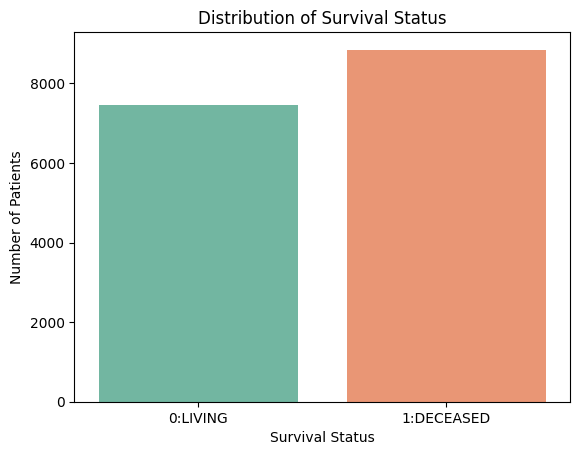

In [13]:
# Survival status distribution
sns.countplot(x='Overall Survival Status', data=df_filtered, palette='Set2')
plt.title('Distribution of Survival Status')
plt.xlabel('Survival Status')
plt.ylabel('Number of Patients')
plt.show()

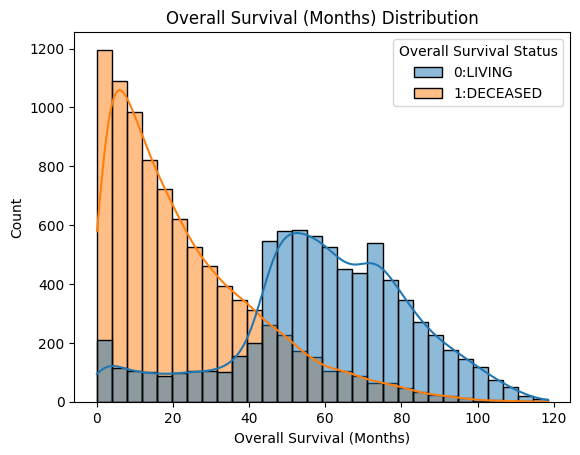

In [14]:
# Survival in months
sns.histplot(data=df_filtered, x='Overall Survival (Months)', bins=30, kde=True, hue='Overall Survival Status')
plt.title('Overall Survival (Months) Distribution')
plt.show()

### . Demographic Analysis

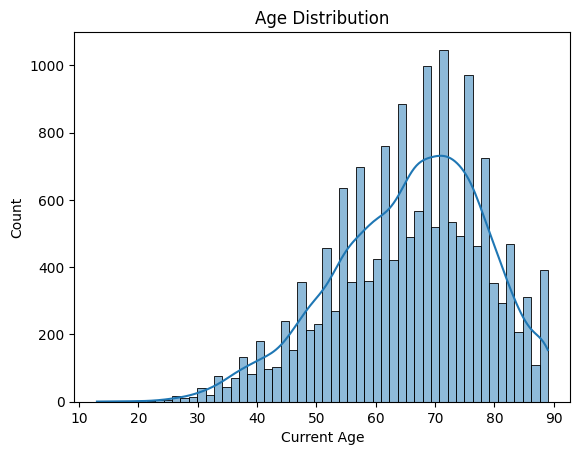

In [15]:
# Age distribution
sns.histplot(data=df_filtered, x='Current Age', kde=True)
plt.title('Age Distribution')
plt.show()

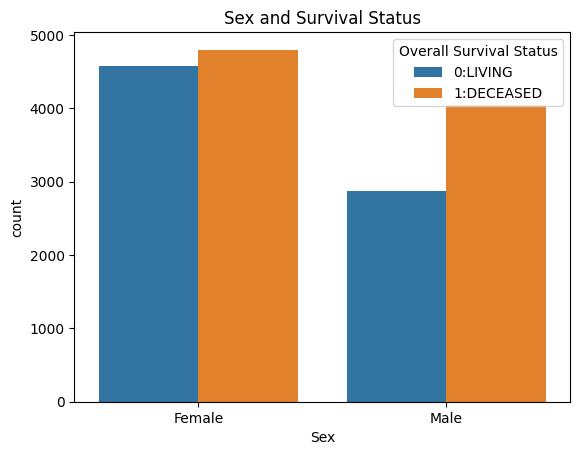

In [16]:
# Sex vs survival
sns.countplot(x='Sex', hue='Overall Survival Status', data=df_filtered)
plt.title('Sex and Survival Status')
plt.show()

/tmp/ipython-input-17-3208368056.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='Race', data=df_filtered, order=df_filtered['Race'].value_counts().index, palette='bright')


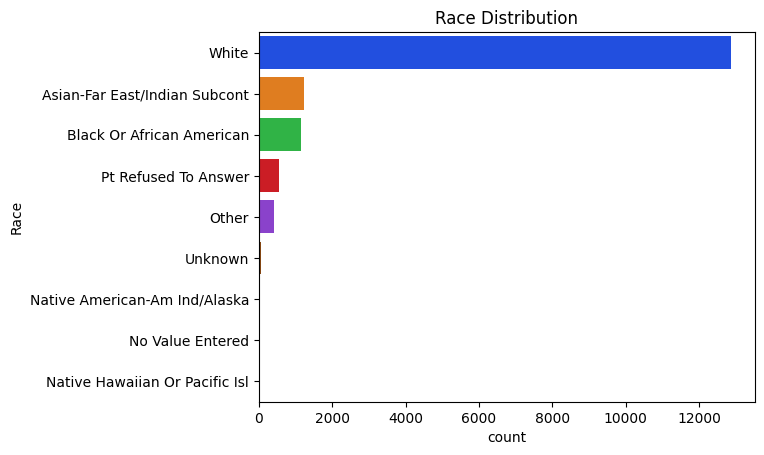

In [17]:
# Race and ethnicity
sns.countplot(y='Race', data=df_filtered, order=df_filtered['Race'].value_counts().index, palette='bright')
plt.title('Race Distribution')
plt.show()

### C. Tumor and Genomic Characteristics

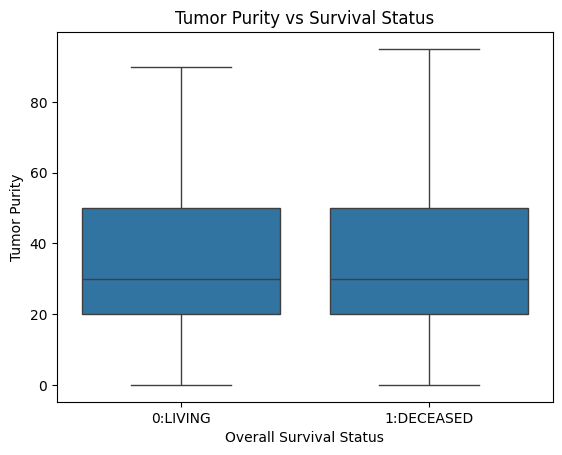

In [18]:
df_filtered['Tumor Purity'] = pd.to_numeric(df_filtered['Tumor Purity'], errors='coerce')

# Tumor Purity
sns.boxplot(x='Overall Survival Status', y='Tumor Purity', data=df_filtered)
plt.title('Tumor Purity vs Survival Status')
plt.show()

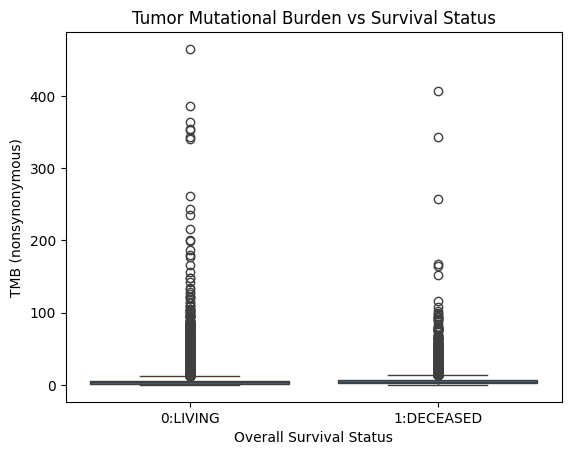

In [19]:
# Tumor Mutational Burden
sns.boxplot(x='Overall Survival Status', y='TMB (nonsynonymous)', data=df_filtered)
plt.title('Tumor Mutational Burden vs Survival Status')
plt.show()

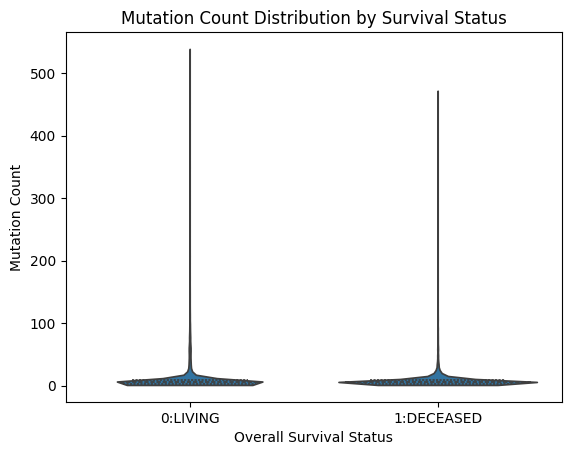

In [20]:
# Mutation Count
sns.violinplot(x='Overall Survival Status', y='Mutation Count', data=df_filtered, inner='quartile', cut=0)
plt.title('Mutation Count Distribution by Survival Status')
plt.xlabel('Overall Survival Status')
plt.ylabel('Mutation Count')
plt.show()

### D. Clinical Staging & Smoking History

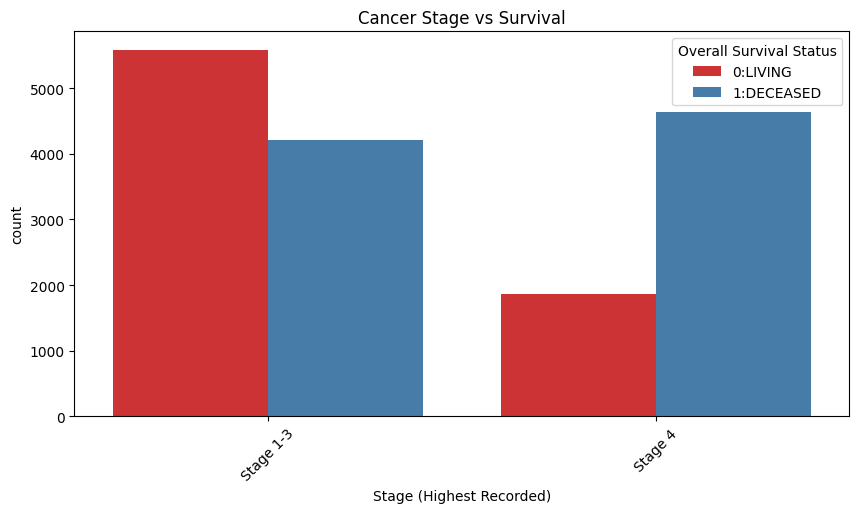

In [21]:
# Stage distribution
plt.figure(figsize=(10, 5))
sns.countplot(x='Stage (Highest Recorded)', hue='Overall Survival Status', data=df_filtered, palette='Set1')
plt.title('Cancer Stage vs Survival')
plt.xticks(rotation=45)
plt.show()

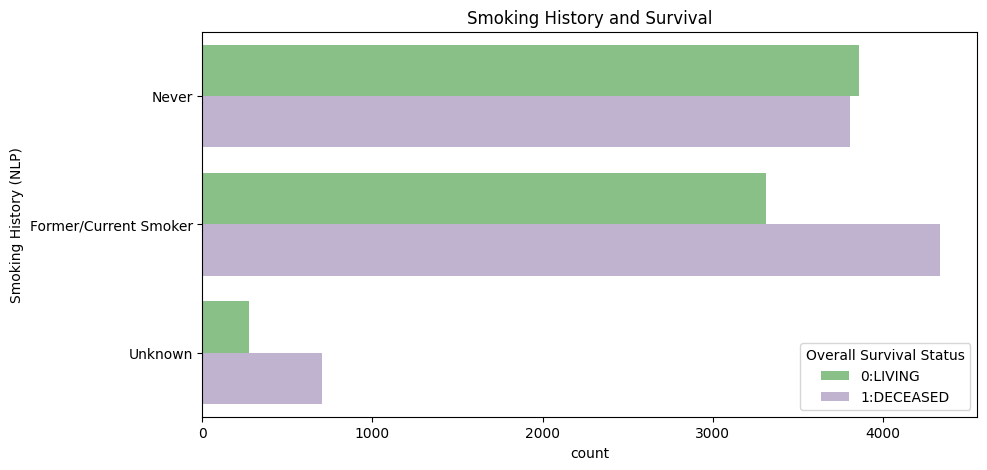

In [22]:
# Smoking history
plt.figure(figsize=(10, 5))
sns.countplot(y='Smoking History (NLP)', hue='Overall Survival Status', data=df_filtered, order=df_filtered['Smoking History (NLP)'].value_counts().index, palette='Accent')
plt.title('Smoking History and Survival')
plt.show()


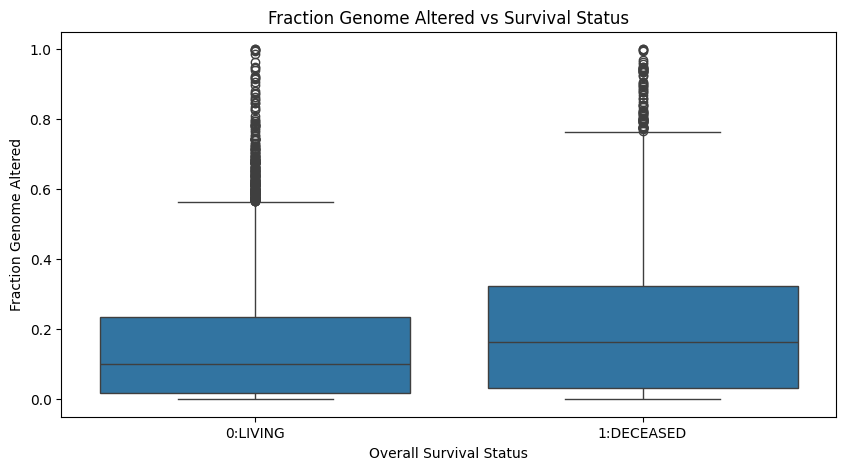

In [23]:
# Fraction Genome Altered
plt.figure(figsize=(10, 5))
sns.boxplot(x='Overall Survival Status', y='Fraction Genome Altered', data=df_filtered)
plt.title('Fraction Genome Altered vs Survival Status')
plt.show()

### E. Survival by Metastatic Site

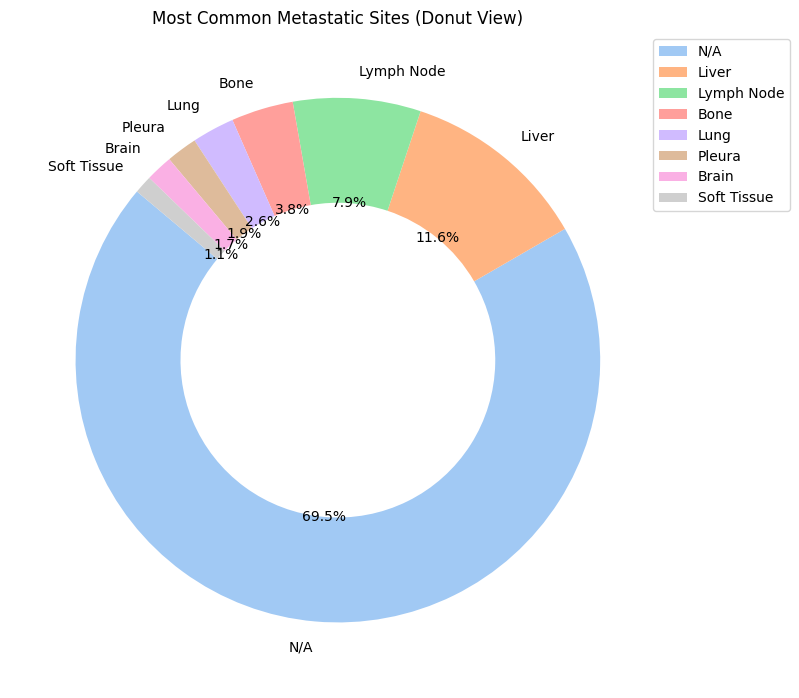

In [24]:
# Count values
site_counts = df_filtered['Metastatic Site'].value_counts().nlargest(8)
colors = sns.color_palette('pastel')[0:8]

plt.figure(figsize=(8, 8))
plt.pie(site_counts, labels=site_counts.index, colors=colors, wedgeprops={'width': 0.4}, startangle=140, autopct='%1.1f%%')
plt.title('Most Common Metastatic Sites (Donut View)')
plt.legend(loc='upper right', bbox_to_anchor=(1.2, 1))
plt.tight_layout()
plt.show()


# 3.2 Feature Engineering

###  Step 1: Correlation Analysis
- Finds the redundant or weakly correlated features in the dataset

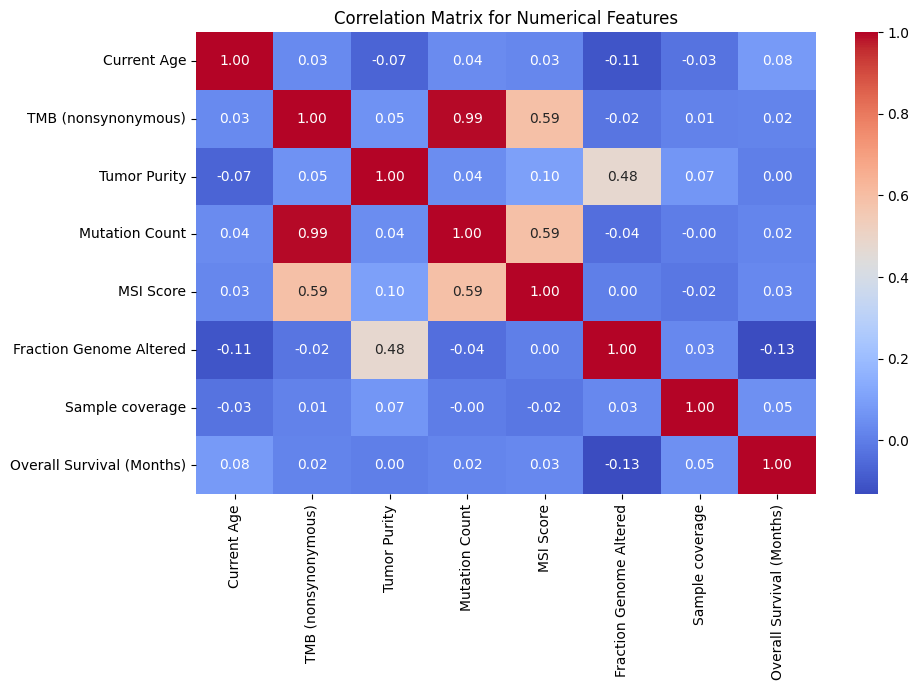

In [25]:
# Select numerical features
numerical_features = ['Current Age', 'TMB (nonsynonymous)', 'Tumor Purity',
                      'Mutation Count', 'MSI Score', 'Fraction Genome Altered',
                      'Sample coverage', 'Overall Survival (Months)']

# Compute correlation matrix
corr_matrix = df_filtered[numerical_features].corr()

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix for Numerical Features")
plt.show()

# Step 2: Chi-Squared Test
 - Assesses the association between categorical variables and survival status.

/tmp/ipython-input-26-1798688842.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=chi2_scores.values, y=chi2_scores.index, palette='Set2')


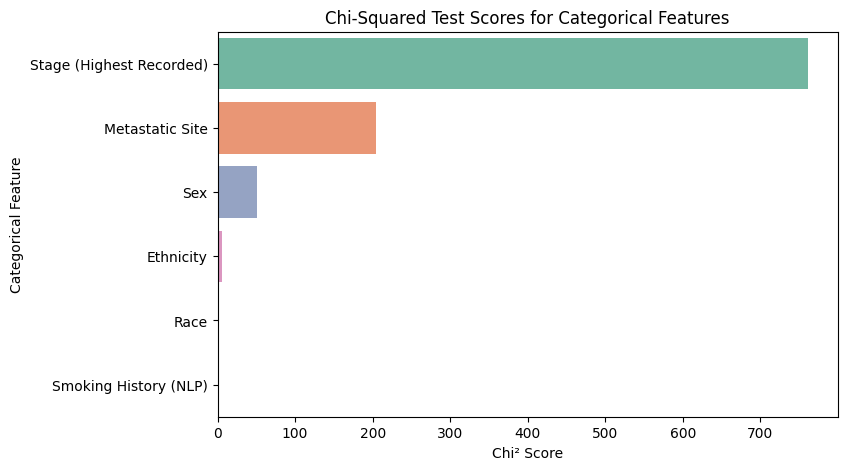

In [26]:
from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectKBest

# Encode categorical variables numerically
cat_features = ['Sex', 'Ethnicity', 'Race', 'Smoking History (NLP)', 'Stage (Highest Recorded)', 'Metastatic Site']
df_cat = df_filtered[cat_features].apply(LabelEncoder().fit_transform)

# Target must be numeric
y = LabelEncoder().fit_transform(df_filtered['Overall Survival Status'])

# Apply Chi2 test
chi2_selector = SelectKBest(score_func=chi2, k='all')
chi2_selector.fit(df_cat, y)
chi2_scores = pd.Series(chi2_selector.scores_, index=cat_features).sort_values(ascending=False)

# Plot
plt.figure(figsize=(8, 5))
sns.barplot(x=chi2_scores.values, y=chi2_scores.index, palette='Set2')
plt.title("Chi-Squared Test Scores for Categorical Features")
plt.xlabel("Chi² Score")
plt.ylabel("Categorical Feature")
plt.show()

### Step 4: Feature Importance

### 1. Logistic Regression – Coefficients as Feature Importance

In [27]:
# Replacing missing values with the mean — recommended for numeric features
numeric_cols = ['TMB (nonsynonymous)', 'Tumor Purity', 'Mutation Count', 'MSI Score', 'Fraction Genome Altered']

for col in numeric_cols:
    df_filtered[col] = pd.to_numeric(df_filtered[col], errors='coerce')  # ensure numeric
    df_filtered[col] = df_filtered[col].fillna(df_filtered[col].mean())  # fill NaNs with mean

In [28]:
X = df_filtered[['Current Age', 'TMB (nonsynonymous)', 'Tumor Purity',
                 'Mutation Count', 'MSI Score', 'Fraction Genome Altered',
                 'Sample coverage']]
y = LabelEncoder().fit_transform(df_filtered['Overall Survival Status'])

# Scale and split
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [29]:
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

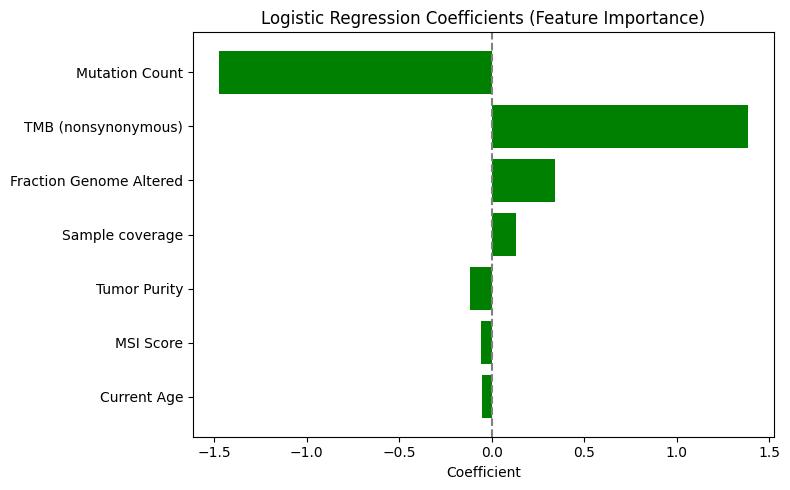

In [30]:
# Get coefficients
coef = logreg.coef_[0]
features = X.columns
coef_df = pd.DataFrame({'Feature': features, 'Coefficient': coef})
coef_df['AbsCoefficient'] = coef_df['Coefficient'].abs()
coef_df = coef_df.sort_values(by='AbsCoefficient', ascending=True)

# Plot
plt.figure(figsize=(8, 5))
plt.barh(coef_df['Feature'], coef_df['Coefficient'], color='green')
plt.axvline(x=0, color='gray', linestyle='--')
plt.title('Logistic Regression Coefficients (Feature Importance)')
plt.xlabel('Coefficient')
plt.tight_layout()
plt.show()

### 2. Random Forest – Feature Importance

In [31]:
X_train_raw, X_test_raw, _, _ = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_raw, y_train)

# Get feature importances
rf_importances = pd.Series(rf.feature_importances_, index=features).sort_values()

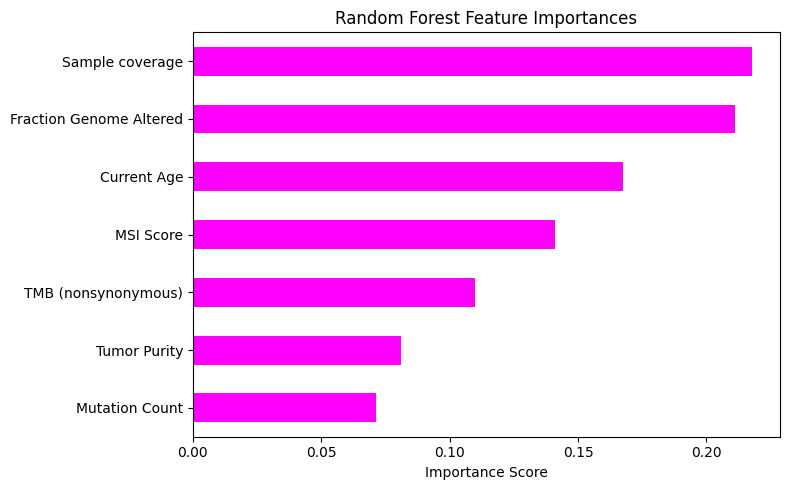

In [32]:
# Plot
plt.figure(figsize=(8, 5))
rf_importances.plot(kind='barh', color='magenta')
plt.title("Random Forest Feature Importances")
plt.xlabel("Importance Score")
plt.tight_layout()
plt.show()

### Step 5 :Encoding Categorical Variables